Название проекта

Описание проекта

Импортирую библиотеки и задаю параметры

In [388]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
import math
pd.options.display.max_info_rows = 11

Загружаю данные из файла

In [389]:
try:
    data=pd.read_csv('c:/ps/project/datasets/games.csv')
except:
    data=pd.read_csv('/datasets/games.csv')

Изучаю содержимое загруженных данных

In [390]:
display(data.head(10))
print(data.describe())
#pd.set_option("max_rows", None)
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries

Вывод

Заменяю названия столбцов приводя их к нижнему регистру.

In [391]:
display(data.columns)
data.columns = data.columns.str.lower()
display(data.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия столбцов переведены в нижний регистр.

Преобразую типы данных в столбцах Year_of_Release к int64 и User_Score к float64

In [392]:
print(f"Пропуски данных данных без указания года составляют {round((len(data.loc[data['year_of_release'].isnull()]) / len(data) *100), 1)}%") #подсчитываю % пропусков в столбце year_of_release
data['year_of_release'] = data['year_of_release'].fillna(1970)
display(len(data.loc[data['year_of_release'].isnull()]) / len(data) *100)
#print(data['year_of_release']. isnull ().count()) #Проверяю наличие пропусков в столбце, релиза даты, чтобы не было пустых данных.
print(data['user_score'].sort_values().unique())
data['user_score'] = data['user_score'].replace('tbd', '0')
data['user_score'] = data['user_score'].fillna(0)
data = data.astype({'year_of_release': 'int', 'user_score' :'float'})
print(data['user_score'].sort_values().unique())


Пропуски данных данных без указания года составляют 1.6%


0.0

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
[0.  0.2 0.3 0.5 0.6 0.7 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.
 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6
 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4
 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2
 9.3 9.4 9.5 9.6 9.7]


В столбце year_of_release содержатся пропуски, они не позволяют преобразовать формат данных. 1,6% от общих данных это достаточно большой процент, чтобы сбрость эти данные, поэтому я решил заменить пропуски 1970 годом.

Столбец user_score содержит пропуски и строку "tbd". tbd это аббревиатура от to be determined, что можно перевести как "будет определено позднее". Логично заменить пропуски и строковые знавения "tbd" нулями.

Посчитаю количествро пропусков во всех столбцах.

In [393]:
print(data.isna().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64


Пропуск с именем не думаю, что скажется на иследовании, пропусков жанра всего два, но при расчетах могут спровоцировать ошибку - удалю. Пропуски счета критиков - много, но удалять не стану - большая потеря в данных, да и на исследованиях я не думаю, что пропуски скажутся - пока оставлю. Причина пропуска проста и естественна - эти игры не оценивали критики.
Пропуски рейтинга - без малого в половине записей - удалить нельзя, а заполнить средними или медианными значениями будет большой ошибкой. Причину пропуска я бы предположил техническую - вероятно для расчета рейтинга требуется какое-то минмальное количество оценок, ну и возможно, что просто игроки не поставили оценок (а может и вообще не играли)).

In [394]:
data = data.dropna(subset=['genre'])
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating             6764
dtype: int64


Удаленные бесбезжанровые оказались и безимянными 

Посчитаю суммарные продажи во всех регионах

In [412]:
sales_columns = [x for x in data.columns if '_sales' in x]
data['total_sales'] = data[sales_columns].sum(axis=1)

В список sales_columns вношу имена столбцов с продажами по регионам, а потом по этим столбцом суммирую и сохраняю в новы столбец total_sales

##### Исследовательский анализ данных

 Посмотрю сколько игр выпускалось в разные годы. И важны ли данные за все периоды.

In [396]:
games_by_year = data.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')
games_by_year.columns = ['games']
display(games_by_year)

,games
year_of_release,
1970,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Визуализирую данные графиком.

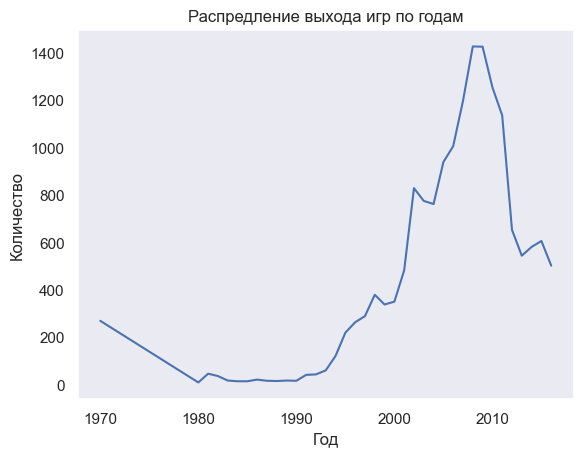

In [397]:
sns.lineplot(x='year_of_release', y='games', data =games_by_year, markers=True, dashes=False)
sns.set(style='darkgrid',)
plt.title('Распредление выхода игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

График наглядно цитирует цифры. 1970г - не принимаем в расчет ибо там оказались все бездатные игры. Рост числа новинок в игровой индустрии шел до 2008 года, а дальше начался спад. Не исключено, что это был количественно\качественный переход.

Посмотрим как менялись продажи по платформам

In [398]:
games_by_platform = data.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum', columns='platform')
games_by_platform = games_by_platform.droplevel(0, axis=1)
display(games_by_platform)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1970,10.50,NaN,1.19,NaN,3.34,1.03,4.97,2.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.33,NaN,10.18,6.17,NaN
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Кажется тут напрашивается тепловая карта

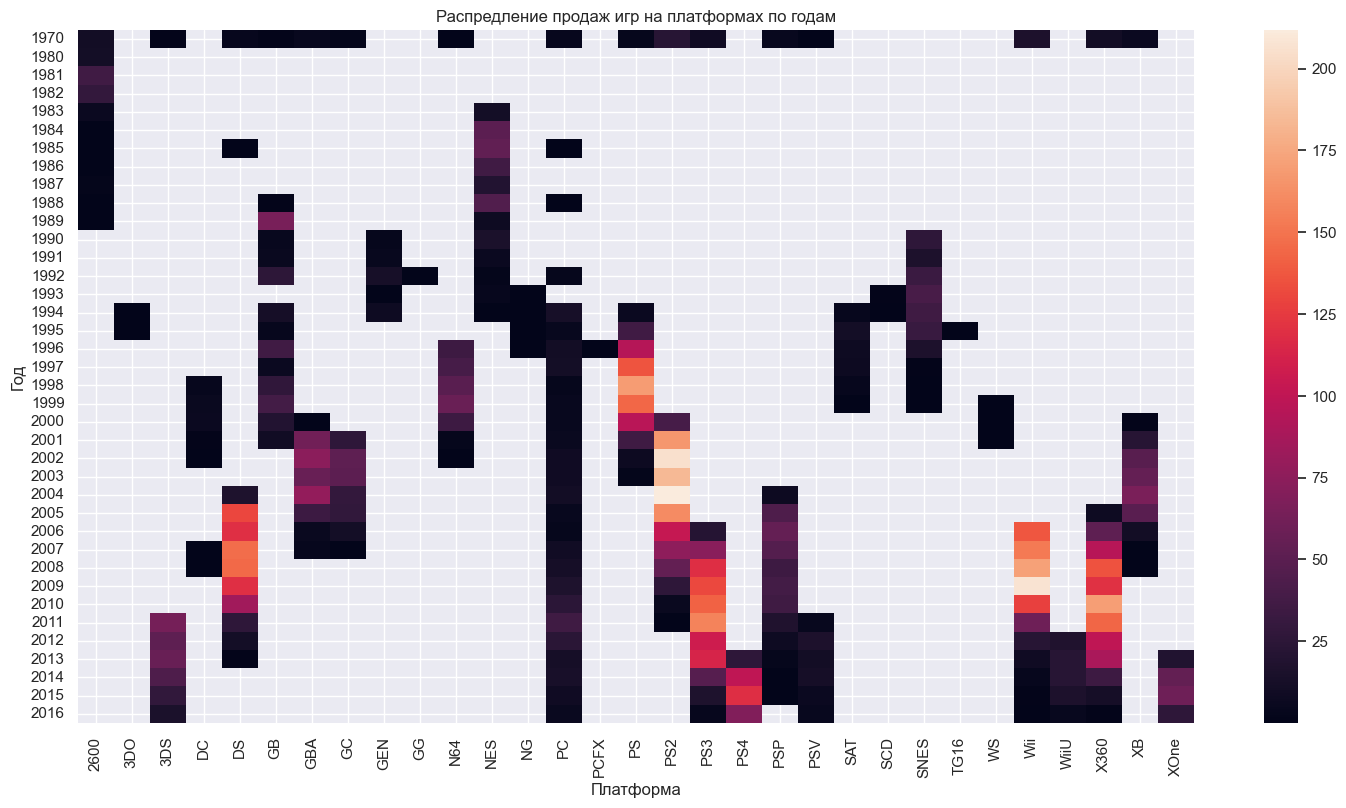

In [399]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.set(style='dark',)
sns.heatmap(games_by_platform)
plt.title('Распредление продаж игр на платформах по годам')
plt.xlabel('Платформа')
plt.ylabel('Год')
#plt.legend() 
plt.show()

По графику видны платформы лидеры продаж это: DS, PS, PS2, PS3, PS4, Wii и X360. Однако, нужно заметить PC платформу, хотя она и не может похвастаться крупными продажами в каком-то году, но продажи почти непрерывны. Судя по графику платвормы живут +- 10 лет. На мой взгляд, в данных присутствуют аномалии, например игровая платформа Nintendo DS. Год ее выпуска 2004, но мы видем продажи по этой платформе в 1985 году. Это скорее всего опечатка\ошибка ввода. И данные из "1970" года мы могли бы приблизительно вернуть в строй заменив его средним по диапазону выхода игр для каждой конкретной платформы.

Стало нестерпимо жалко данные по играм, у которых не указан год выхода, и я решил им присвоить год средний из диапазона выхода игр для платформы. Т.е., к примеру, платформа 3DS получала новые игры с 2011 по 2016. Возьму среднее и скруглю до целого в большую сторону. Метод ощущается так себе, поэтому сохраню его в отдельный датафрейм, вдруг пригодится дальше.

In [400]:
data_assum_year = data
for c in games_by_platform.columns:
    t = math.ceil(mean(games_by_platform[c].iloc[1:].dropna().index.tolist()))
    data_assum_year.loc[(data_assum_year['platform'] == c) & (data_assum_year['year_of_release'] == 1970), 'year_of_release'] = t

In [401]:
display(data_assum_year.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum', columns='platform'))

total_sales                                                  \
platform               2600   3DO    3DS    DC      DS     GB    GBA     GC   
year_of_release                                                               
1980                  11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1981                  35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1982                  28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1983                   5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1984                   0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1985                  10.95   NaN    NaN   NaN    0.02    NaN    NaN    NaN   
1986                   0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1987                   1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1988                   0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN   
1989                   0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN   
1990                    NaN   NaN    NaN   NaN     NaN   4.89    NaN    NaN   
1991                    NaN   NaN    NaN   NaN     NaN   5.57    NaN    NaN   
1992                    NaN   NaN    NaN   NaN     NaN  25.49    NaN    NaN   
1993                    NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN   
1994                    NaN  0.02    NaN   NaN     NaN  12.18    NaN    NaN   
1995                    NaN  0.08    NaN   NaN     NaN   4.63    NaN    NaN   
1996                    NaN   NaN    NaN   NaN     NaN  36.03    NaN    NaN   
1997                    NaN   NaN    NaN   NaN     NaN   6.37    NaN    NaN   
1998                    NaN   NaN    NaN  3.38     NaN  26.90    NaN    NaN   
1999                    NaN   NaN    NaN  5.16     NaN  38.00    NaN    NaN   
2000                    NaN   NaN    NaN  5.99     NaN  19.76   0.07    NaN   
2001                    NaN   NaN    NaN  1.07     NaN   9.24  61.53  26.34   
2002                    NaN   NaN    NaN  0.29     NaN    NaN  74.16  51.81   
2003                    NaN   NaN    NaN   NaN     NaN    NaN  56.67  50.61   
2004                    NaN   NaN    NaN   NaN   17.27    NaN  82.88  31.02   
2005                    NaN   NaN    NaN   NaN  130.14    NaN  33.86  27.62   
2006                    NaN   NaN    NaN   NaN  119.81    NaN   5.28  11.26   
2007                    NaN   NaN    NaN  0.02  150.28    NaN   3.40   0.27   
2008                    NaN   NaN    NaN  0.04  145.31    NaN    NaN    NaN   
2009                    NaN   NaN    NaN   NaN  119.54    NaN    NaN    NaN   
2010                    NaN   NaN    NaN   NaN   85.02    NaN    NaN    NaN   
2011                    NaN   NaN  63.20   NaN   26.18    NaN    NaN    NaN   
2012                    NaN   NaN  51.36   NaN   11.01    NaN    NaN    NaN   
2013                    NaN   NaN  56.57   NaN    1.54    NaN    NaN    NaN   
2014                    NaN   NaN  44.95   NaN     NaN    NaN    NaN    NaN   
2015                    NaN   NaN  27.78   NaN     NaN    NaN    NaN    NaN   
2016                    NaN   NaN  15.14   NaN     NaN    NaN    NaN    NaN   

                              ...                                          \
platform           GEN    GG  ...    SAT   SCD   SNES  TG16    WS     Wii   
year_of_release               ...                                           
1980               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1981               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1982               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1983               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1984               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1985               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1986               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1987               NaN   NaN  ...    NaN   NaN    NaN   NaN   NaN     NaN   
1988    

В своих расчетах, опираясь на полученные данные, я пришел к выводу, что обычно срок жизни платформы около 10 лет. Поэтому для расчета на 2017 год я возьму данные за 5 лет - с 2011 по 2016. Оставлю записи только о десятке лучших платформ с прибылью за последние 5 лет.

In [402]:
actual_data = data_assum_year[data_assum_year['year_of_release']>=2011]
actual_platforms = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales',ascending=False).head(10).index.to_list()
display(actual_platforms)
actual_data = actual_data[actual_data['platform'].isin(actual_platforms)]
display(actual_data)

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'Wii', 'PC', 'WiiU', 'PSV', 'DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,0.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,0.0,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01


Получил табличку актуальных данных, в ней топ 10 платформ за 5 лет.

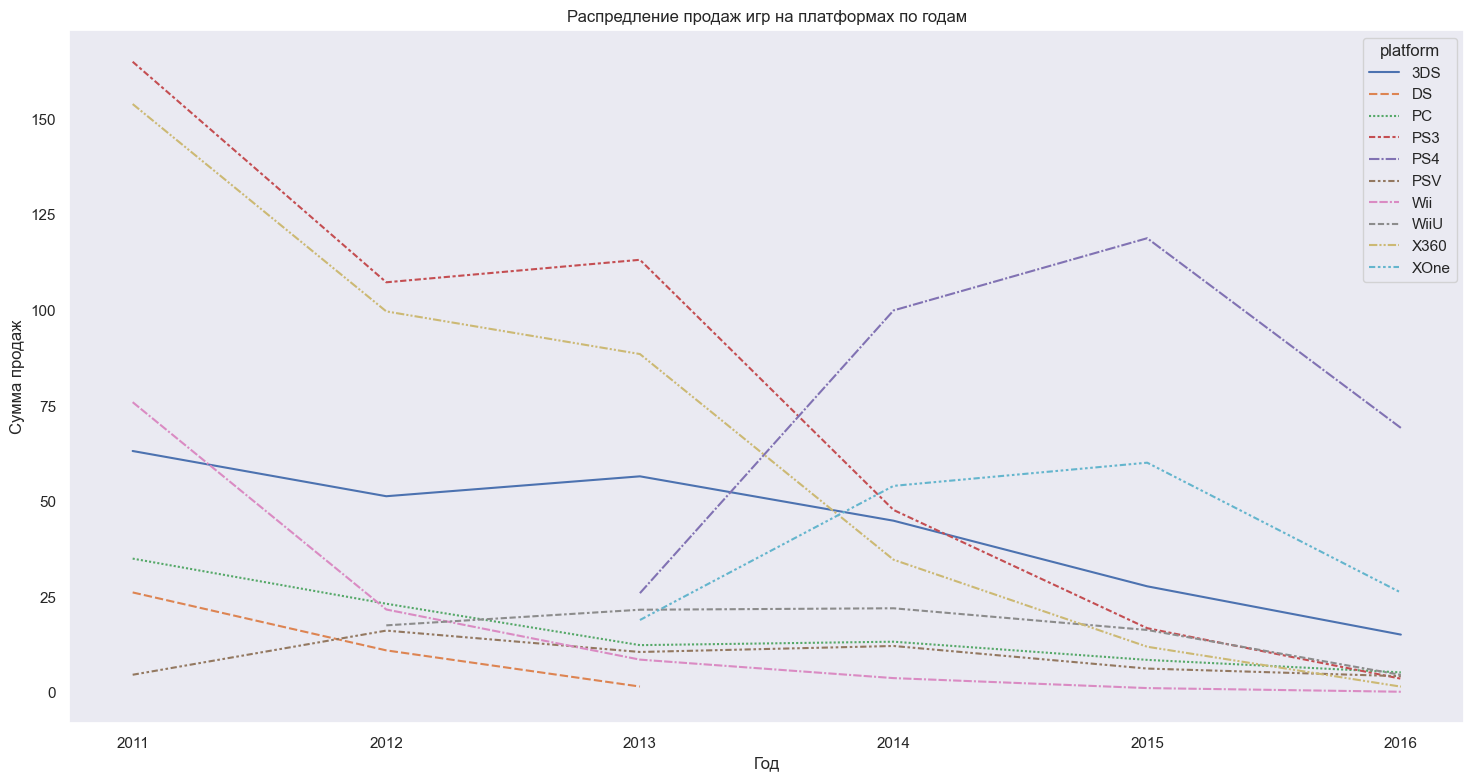

In [403]:

fig, ax = plt.subplots(figsize=(18, 9))
sns.lineplot(data=actual_data.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum', columns='platform').droplevel(0, axis=1), linestyle = 'solid')
plt.title('Распредление продаж игр на платформах по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

То есть по графикам виден спад продаж на все платформах. В эти года в Европе был миграционный кризис, а по всему миру прокатилась серия терактов. Может быть это стало причиной спада, но моежт быть причиной был банальный кризис отрасли. Только две платформы имели ярковыруженную положительную динамику с 2013 по 2015 год, это XBoxOne и PS4. У Nintenod 3DS хотя и отрицательная динамика, но абсолютные значения позволяют ее включить в тройку перспективных платформ на 2017 год. 

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

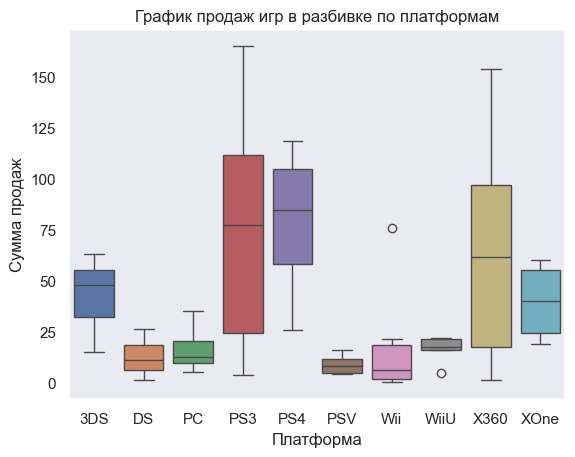

In [404]:
sns.boxplot(data = actual_data.pivot_table(index=['year_of_release'], columns='platform', aggfunc='sum', values='total_sales'))
plt.title('График продаж игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

PS3 и X360 имеют самые широкие квартильные размахи, а медианы находятся практически по центру. График PS4 имеет большую плотность данных. Выбросы наблюдаются только у Wii и WiiU.

Построю диаграмму рассеяния для отзывов пользователей и критиков для трех популярных платформ.

In [405]:
display(actual_data['critic_score'].max())
actual_data['critic_score'] = actual_data['critic_score'] / 10

97.0

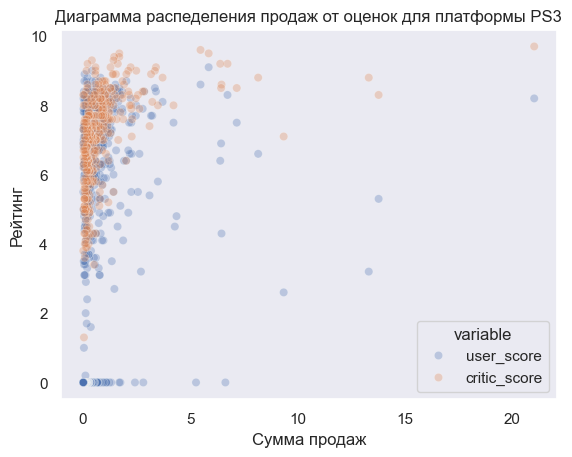

Связь для платформы PS3 между оценками и продажами не прослеживается


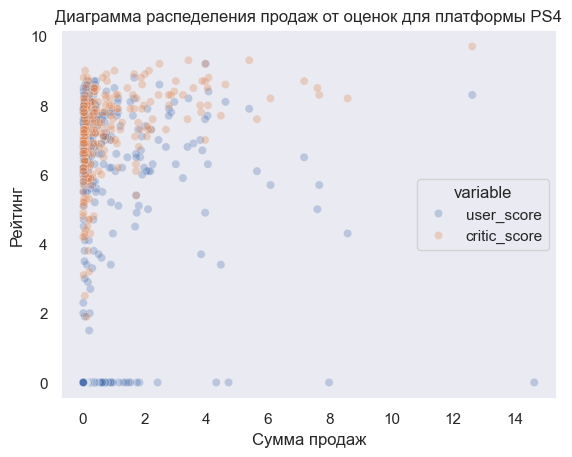

Связь для платформы PS4 между оценками и продажами не прослеживается


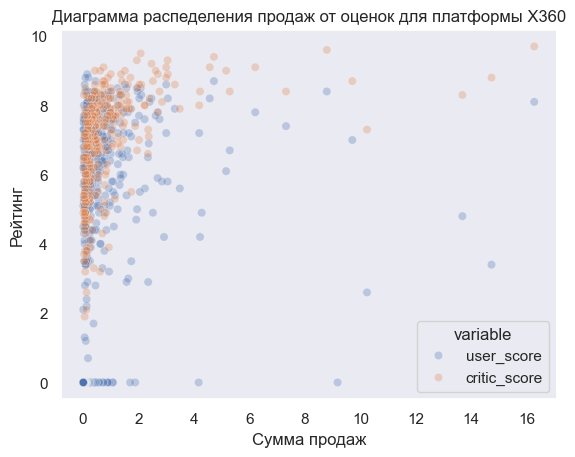

Связь для платформы X360 между оценками и продажами не прослеживается


In [406]:
top_platforms = ['PS3', 'PS4', 'X360']
for p in top_platforms:
    #display(actual_data.loc[actual_data['platform'] == p].melt(id_vars=['total_sales'], value_vars=['user_score', 'critic_score']))
    df_melted = actual_data.loc[(actual_data['platform'] == p)].melt(id_vars=['total_sales'], value_vars=['user_score', 'critic_score']).dropna(subset='value')
    sns.scatterplot(data = df_melted, x='total_sales', y='value', hue='variable', alpha=0.3)
    plt.title('Диаграмма распеделения продаж от оценок для платформы ' + p)
    plt.xlabel('Сумма продаж')
    plt.ylabel('Рейтинг')
    plt.show()
    if df_melted['total_sales'].corr(df_melted['value']) < 0.5:
        print(f'Связь для платформы {p} между оценками и продажами не прослеживается')
    else:
        print(f'Для платформы {p} наблюдается взаимосвязь между продажами и оценками')

Как по графикам, так и по вычислениям я могу сделать вывод, что взаимосвязи между продажами и оценками для тройки популярных платформ не наблюдается.

Вычислю соотношение продаж по жанрам. 

,sum
genre,
Action,566.23
Shooter,406.91
Sports,237.66
Role-Playing,237.50


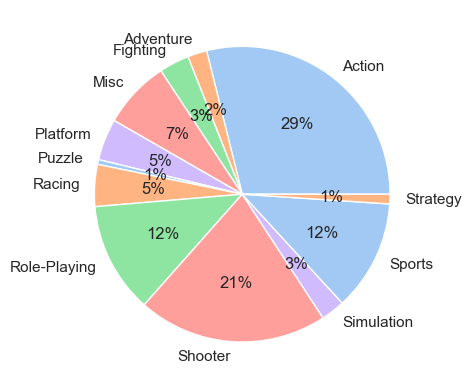

In [407]:
pie = actual_data.groupby(['genre']).agg({'total_sales': ['sum']}).droplevel(0, axis=1)
display(pie.sort_values(by=['sum'], ascending= False).head(4))
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(pie['sum'], labels = pie.index.to_list(), colors = colors, autopct='%.0f%%')
plt.show()

Тут все кристально ясно: лидеры отрасли это Action, Shooter, Sports и RPG. А аутсайдеров больше в 2 раза.  

Вычислю ТОП 5 платформ и жанров для регионов NA, EU и JP

In [408]:
for p in ['platform', 'genre']:
    for v in ['na_sales', 'eu_sales', 'jp_sales']:
        if p == 'platform':
            print(f"Топ 5 платформ для региона {v.split('_')[0].upper()}:\
{actual_data.pivot_table(index=p, values=v, aggfunc='sum').head(5).sort_values(by=v, ascending=False).index.to_list()}")
        if p == 'genre':
            print(f"Топ 5 жанров для региона {v.split('_')[0].upper()}:\
{actual_data.pivot_table(index=p, values=v, aggfunc='sum').head(5).sort_values(by=v, ascending=False).index.to_list()}")


Топ 5 платформ для региона NA:['PS3', 'PS4', '3DS', 'PC', 'DS']
Топ 5 платформ для региона EU:['PS3', 'PS4', '3DS', 'PC', 'DS']
Топ 5 платформ для региона JP:['3DS', 'PS3', 'PS4', 'DS', 'PC']
Топ 5 жанров для региона NA:['Action', 'Misc', 'Platform', 'Fighting', 'Adventure']
Топ 5 жанров для региона EU:['Action', 'Misc', 'Platform', 'Fighting', 'Adventure']
Топ 5 жанров для региона JP:['Action', 'Misc', 'Platform', 'Fighting', 'Adventure']


Из всего обилия разнообразия выделятся только Японский регион своей привязанностью к продукции компании Nintendo. Патриотично.

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,141.0,36.0,172.0,41.0
E10+,81.0,11.0,123.0,25.0
EC,0.0,0.0,0.0,0.0
M,252.0,27.0,311.0,82.0
RP,0.0,0.0,0.0,0.0
T,86.0,32.0,117.0,29.0


<Axes: ylabel='rating'>

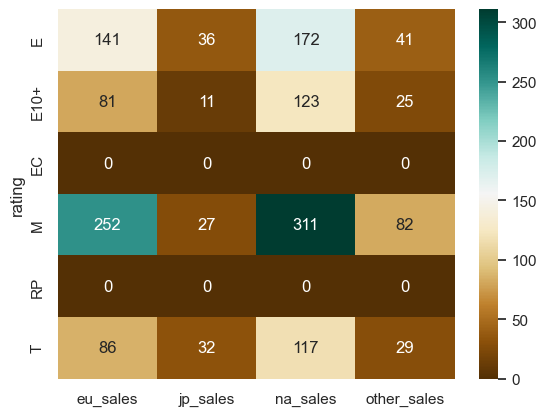

In [413]:
#display(actual_data[actual_data['rating'].notnull()])
t = actual_data.pivot_table(index='rating', values=['na_sales',	'eu_sales',	'jp_sales',	'other_sales'], aggfunc='sum')
display(t.round())
sns.heatmap(t.round(), annot=True, cmap='BrBG', fmt='g')


На Японский регион сильного значения рейтинг не влияет (что логично ибо Япония использует свой стандарт - CERO), а между Европейскими и Североамериканскими продажами игр в разрезе наблюдается закономерность: самый популярный рейтинг - М (что так же логично - масса людей возрастом 17+ подавляюще бОльшая), на втором месте - Е, третье место поделили Т и Е10. На продажи в "Других" регионах рейтинг так же не оказывает, скорее всего по причине того что там он не используется.

##### 5. Проверка гипотез

а. Проверю гипотезу о равенсте средний пользовательских рейтингов для платформ Xbox One и PC.

Для проверки сформирую две гипотезы:
- Нулевая гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC равны.
 
- Альтернативная гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC не равны.

In [410]:
alpha = 0.01
results = st.stats.ttest_ind(actual_data[actual_data['platform'] == 'X360']['user_score'], actual_data[actual_data['platform'] == 'PC']['user_score'])
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.026537116094383247
Нет оснований отвергнуть нулевую гипотезу


C:\Users\abrik\AppData\Local\Temp\ipykernel_23820\1471842970.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(actual_data[actual_data['platform'] == 'X360']['user_score'], actual_data[actual_data['platform'] == 'PC']['user_score'])


Я не отвергаю нулевую гипотезу о том, что пользовательские рейнинги для платформ Xbox One и PC равны.

b. Проверю следующую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки сформирую две гипотезы:

 - нулевая - средние пользовательские рейтинги жанров Action и Sports равны
 - альтернативная - средние пользовательские рейтинги жанров Action и Sports **не** равны

In [411]:
alpha = 0.01
results = st.stats.ttest_ind(actual_data[actual_data['genre'] == 'Action']['user_score'], actual_data[actual_data['genre'] == 'Sports']['user_score'])
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.7853264088624597
Нет оснований отвергнуть нулевую гипотезу


C:\Users\abrik\AppData\Local\Temp\ipykernel_23820\1562863920.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(actual_data[actual_data['genre'] == 'Action']['user_score'], actual_data[actual_data['genre'] == 'Sports']['user_score'])


В этом случае предположение высказанное в условии не подтвердилось. Средние пользовательские рейтинги для Action и Sports вероятно близки друг к другу.

#### Итоговый вывод

Для выполнения исследования я воспользовался библиотеками: 
- pandas
- scipy
- seaborn
- matplotlib
- statistics 
- math
##### Предобработка данных
На входе, для исследования мною был получен файл с данными клиентов нтернет-магазина «Стримчик». Данные охватывают период продаж игр магазином с 1980 по 2016 года. В ходе работы данные из файла были загружены и проанализированы. Выяснилось, что пропуски данных без указания года выпуска игры и записи “tbd” (будут заполнены позже) составляют 1,6%. На мой взгляд это достаточно весомый процент и в дальнейших вычислениях я восстановлю их, опираясь на сопоставление платформы и среднего года для каждой платформы. Наименования столбцов я привел к единому виду в нижнем регистре. Данные в столбце ‘year_of_release’ имеют формат числа с плавающий точкой, хотя содержит целочисленные данные, а ‘user_score’ имеет формат ‘object’ при хранении в нем чисел с плавающей точкой. Я привел типы вышеуказанных столбцов к их корректным типам данных. Следующим шагом я обработал пропуски в остальных столбцах, они оказались в перечне (name, genre, critic_score, rating). Удалил записи для genre, а они совпали и с name. Дополнил данные столбцом ‘total_sales’ в котором хранятся суммы продаж во всех регионах для каждой игры.
##### Исследовательский анализ данных.
Провожу анализ выхода игр по годам и визуализирую это. Выяснилось, что продажи активно росли до 2008 года, а далее, до конца имеющихся данных был нисходящий тренд. Данные за 1970 год я не учитываю.
Следующим этапом я исследую распределение в разрезе платформа\год. Получив сводную таблицу, визуализирую ее с помощью тепловой карты. Она указывает мне на лидеров отрасли за последние годы, ими стали DS, PS, PS2, PS3, PS4, Wii и X360. Так же этот график навел меня на идею присвоения пропущенных данных в столбце года выхода игры средним значением по годам выхода игры на конкретной платформе. Это был вынужденный шаг для сохранения 1,6% записей. Далее я сформировал таблицу актуальных данных ‘actual_data’. За актуальные я принял данные за последние 5 лет. В эти данные попали записи только топ 10 платформ за этот период.
По полученному датафрейму я строю график продаж для каждой платформы. Из него я сделал вывод, что общая тенденция рынка видеоигр идет на спад. Лучшими по графику являются XBoxOne, PS4 и Nintenod 3DS. 
Необходимо проверить взаимосвязь между продажами и оценками пользователей и критиков. Чтобы это выполнить я построил соответствующие графики и вычислил корреляцию. Все эти исследования не указали на наличие взаимосвязи.
Посредством метода groupby я вычислил соотношение продаж по жанрам и для наглядности построю круговую диаграмму. Лидерами оказались Action, Shooter, Sports и RPG.
Вычислив ТОП 5 платформ и жанров для регионов NA, EU и JP я делаю вывод, что в этих регионах тройка самых прибыльных игр выходит в жанрах Action, Misc и Platform на PS3, PS4 или 3DS. 
Далее я рассмотрел влияние рейтинга ESRB на продажи в разных регионах. Для наглядности я построил тепловую карту на основе полученных вычислений. Оказывается, что рейтинг влияет на продажи Североамериканского и Европейского регионов. Для них тройка популярных рейтингов распределена так: М, Е, а третье место делят Т и Е10.
##### Проверка гипотез
В задании были изложены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.
В результате использования метода ttest_ind для проверки вышеуказанных гипотез получил результаты:
1. первая гипотеза:
 - Нулевая гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC равны.
 
 - Альтернативная гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC не равны.
результат: p-value: 0.026537116094383247
Нет оснований отвергнуть нулевую гипотезу

2. вторая гипотеза:
 - нулевая - средние пользовательские рейтинги жанров Action и Sports равны
 - альтернативная - средние пользовательские рейтинги жанров Action и Sports **не** равны
результат: p-value: 0.7853264088624597
Нет оснований отвергнуть нулевую гипотезу

Подводя итог можно рекомендовать акцентировать внимание в 2017 году на играх в жанрах Action, Misc и Platform с рейтингами М и Е для платформ PS3, PS4 или 3DS.